<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

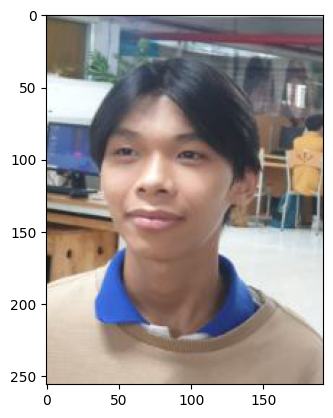

(625, 120, 120, 3)
(1, 120, 120, 3)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from keras.utils.image_utils import load_img
from keras.utils.image_dataset import load_image
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/999_FACE_REC/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Cuong'):
      output = 1 
  if file.startswith('Đat'):
      output = 2
  if file.startswith('Danh'):
      output = 3
  if file.startswith('Dien'):
      output = 4
  if file.startswith('Huy'):
      output = 5
  if file.startswith('Khang'):
      output = 6
  if file.startswith('Tan'):
      output = 7
  if file.startswith('Thuan'):
      output = 8 
  if file.startswith('Truc'):
      output = 9
                
  img = load_img(folder + file,target_size=(120,120))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
    
x_train = photos.reshape(625, 120,120,3)
x_train = photos.astype('float32')/255
y_train = to_categorical(labels,10)

imgtest = plt.imread('/content/drive/MyDrive/999_FACE_REC/Khang (40).jpg')
plt.imshow(imgtest)
plt.show()
imgt = load_img('/content/drive/MyDrive/999_FACE_REC/Khang (40).jpg',target_size=(120,120))
phototest = img_to_array(imgt)
x_test = phototest.reshape(1, 120,120,3)
x_test = x_test.astype('float32')/255
print(photos.shape)
print(x_test.shape)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model=Sequential()
#1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',
                 input_shape=(120,120,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

#2
model.add(Conv2D(64,(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(128,(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10, activation='softmax'))
model.summary()

from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=20, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

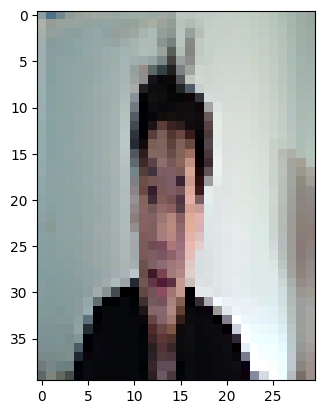

In [19]:
import pandas as pd
url = 'Dien (17).png'
img = plt.imread(url)
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 65ms/step


array([4])

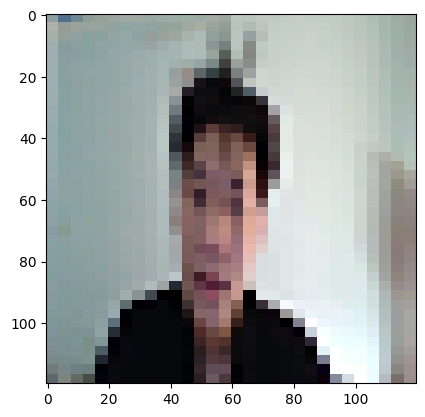

In [20]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (120,120))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 120,120,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)